In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score as acc

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning) 

In [3]:
player_regular_season_stats = pd.read_csv("NBA Dataset/player_regular_season.txt",sep=',')
player_regular_season_stats = player_regular_season_stats[player_regular_season_stats.year > 1969]
player_regular_season_stats = player_regular_season_stats[player_regular_season_stats.leag == 'N']
player_regular_season_stats = player_regular_season_stats.drop(columns=['oreb','dreb','leag'],axis=1)

In [4]:
predict_season = 1999

In [5]:
final_df = pd.DataFrame(player_regular_season_stats[player_regular_season_stats.year == predict_season])

In [6]:
final_df

,ilkid,year,firstname,lastname,team,gp,minutes,pts,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
15986,ABDULTA01,1999,Tariq,Abdul-wahad,DEN,15,373,134,52,26,6,12,19.0,31,131,51,42,31,2,1
15987,ABDULTA01,1999,Tariq,Abdul-wahad,ORL,46,1205,563,239,72,53,16,87.0,116,515,223,151,115,21,2
15988,ABDULTA01,1999,Tariq,Abdul-wahad,TOT,61,1578,697,291,98,59,28,106.0,147,646,274,193,146,23,3
15989,ABDURSH01,1999,Shareef,Abdur-rahim,VAN,82,3223,1663,825,271,89,87,249.0,244,1277,594,551,446,96,29
15990,ALEXACO01,1999,Cory,Alexander,DEN,29,329,82,42,58,24,2,28.0,39,98,28,22,17,35,9
15991,ALLENRA02,1999,Ray,Allen,MIL,82,3070,1809,359,308,110,19,183.0,187,1411,642,398,353,407,172
15992,ALSTORA01,1999,Rafer,Alston,MIL,27,361,60,23,70,12,0,29.0,29,95,27,4,3,14,3
15993,AMAECJO01,1999,John,Amaechi,ORL,80,1684,836,266,95,35,37,139.0,161,700,306,291,223,6,1
15994,ANDERDE01,1999,Derek,Anderson,LAC,64,2201,1080,258,220,90,11,167.0,149,860,377,309,271,178,55
15995,ANDERKE02,1999,Kenny,Anderson,BOS,82,2593,1149,225,420,139,8,130.0,230,986,434,253,196,220,85


In [7]:
eff_score = []
for i in final_df.index:
    row = final_df.loc[i,:]
    value = (int(row['pts']) + int(row['reb']) + int(row['asts']) - (int(row['fga']) - int(row['fgm'])) - (int(row['fta']) - int(row['ftm'])) - (int(row['tpa']) -int(row['tpm']))) / int(row['gp'])
    eff_score.append(value)
final_df['eff_score'] = eff_score
final_df.sort_values(by='eff_score', ascending=False, inplace = True)

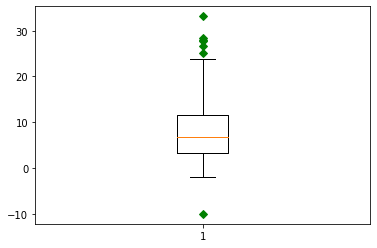

In [28]:
plt.figure()
plt.boxplot(final_df['eff_score'],0, 'gD')
plt.savefig('Plots/mvp_box_plot.png')
plt.show()

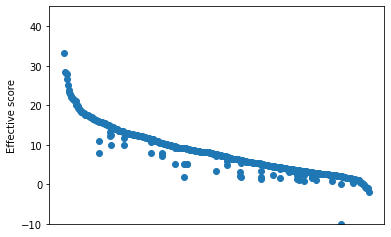

In [27]:
plt.figure()
plt.scatter(final_df['ilkid'],final_df['eff_score'])
plt.ylim(min(final_df['eff_score']),45)
plt.ylabel('Effective score')
plt.xticks([])
plt.savefig('Plots/mvp_scatter_eff.png')
plt.show()

In [10]:
clf=IsolationForest(n_estimators=100, behaviour='new', contamination=0.067, max_features=1.0,random_state=0)

In [11]:
y = np.zeros(496)
y[343] = 1

In [12]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[50,100,200],'behaviour':['new','old'],'contamination':[0.067,0.04,0.03,0.02,0.01,0.1,0.2,0.3]}
grd = GridSearchCV(clf, param_grid=parameters,cv=5,scoring='accuracy')
grd.fit(final_df.values[:,5:],y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=IsolationForest(behaviour='new', bootstrap=False,
                                       contamination=0.067, max_features=1.0,
                                       max_samples='auto', n_estimators=100,
                                       n_jobs=None, random_state=0, verbose=0,
                                       warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'behaviour': ['new', 'old'],
                         'contamination': [0.067, 0.04, 0.03, 0.02, 0.01, 0.1,
                                           0.2, 0.3],
                         'n_estimators': [50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [13]:
grd.best_params_

{'behaviour': 'new', 'contamination': 0.067, 'n_estimators': 50}

In [14]:
clf.fit(final_df.values[:,5:])

IsolationForest(behaviour='new', bootstrap=False, contamination=0.067,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [15]:
pred = clf.predict(final_df.values[:,5:])
final_df['anomaly_score'] = clf.decision_function(final_df.values[:,5:])
final_df['anomaly']=pred
outliers=pd.DataFrame(final_df.loc[final_df['anomaly']==-1])
outliers.sort_values(by='anomaly_score',inplace=True)

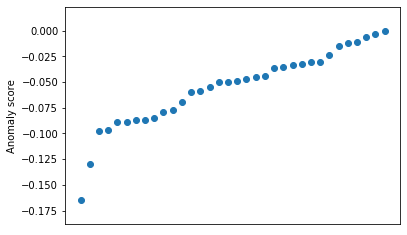

In [24]:
plt.figure()
plt.scatter(outliers['ilkid'],outliers['anomaly_score'])
plt.ylabel('Anomaly score')
plt.xticks([])
plt.savefig('Plots/mvp_scatter_anomaly.png')
plt.show()

In [17]:
#Based on eff_score:
def method_1(year):
    final_df = pd.DataFrame(player_regular_season_stats[player_regular_season_stats.year == year])
    eff_score = []
    for i in final_df.index:
        row = final_df.loc[i,:]
        value = (int(row['pts']) + int(row['reb']) + int(row['asts']) - (int(row['fga']) - int(row['fgm'])) - (int(row['fta']) - int(row['ftm'])) - (int(row['tpa']) -int(row['tpm']))) / int(row['gp'])
        eff_score.append(value)
    final_df['eff_score'] = eff_score
    final_df.sort_values(by='eff_score', ascending=False, inplace = True)
    #print(final_df.head(5))
    return final_df.head(5)

In [18]:
#Based on isolation forest:
def method_2(year):
    final_df = pd.DataFrame(player_regular_season_stats[player_regular_season_stats.year == year])
    clf.fit(final_df.values[:,5:])
    pred = clf.predict(final_df.values[:,5:])
    pred_scores = clf.decision_function(final_df.values[:,5:])
    final_df['anomaly_scores']=pred_scores
    final_df['anomaly']=pred
    outliers=pd.DataFrame(final_df.loc[final_df['anomaly']==-1])
    outliers.sort_values(by='anomaly_scores',inplace=True)
    #print(outliers.head(5))
    return outliers.head(5)

In [19]:
ground_truth_mvp = pd.read_csv("nba_mvp_gt.csv",sep=',')
ground_truth_mvp = ground_truth_mvp[ground_truth_mvp.year > 1969]
ground_truth_mvp = ground_truth_mvp[ground_truth_mvp.year < 2005]
y_truths = np.ones(35)

In [20]:
y_truths_pred = []
for year in range(1970,2005):
    eff_score_outliers = method_1(year)
    eff_score_outliers_ilkids = eff_score_outliers.ilkid.tolist()
    eff_score_outliers_ilkids = [x.lower() for x in eff_score_outliers_ilkids]
    actual_mvp_row = ground_truth_mvp[ground_truth_mvp.year==year].ilkid.tolist()
    if actual_mvp_row[0] in eff_score_outliers_ilkids:
        #print("Actual MVP predicted by Effective Score")
        y_truths_pred.append(1)
    else:
        print("\t\t",year)
        #print("\t\tActual MVP not predicted by any")
        #print("\t\tExpected MVP:",actual_mvp_row[0])
        #print("\t\tEffective MVPs:",eff_score_outliers_ilkids)
        y_truths_pred.append(0)

		 1972
		 1980
		 1995
		 1997
		 2000
		 2004


In [21]:
y_truths_pred = np.array(y_truths_pred)
print(y_truths_pred)
print(acc(y_truths,y_truths_pred))

[1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0]
0.8285714285714286


In [22]:
y_truths_pred = []
for year in range(1970,2005):
    isolation_outliers = method_2(year)
    isolation_outliers_ilkids = [x.lower() for x in isolation_outliers.ilkid.tolist()]
    actual_mvp_row = ground_truth_mvp[ground_truth_mvp.year==year].ilkid.tolist()
    #print(actual_mvp_row)
    if actual_mvp_row[0] in isolation_outliers_ilkids:
        #print("Actual MVP predicted by isolation forest")
        y_truths_pred.append(1)
    else:
        y_truths_pred.append(0)
        print("\t\t",year)
        #print("\t\tActual MVP not predicted by isolation forest")
        #print("\t\tExpected MVP:",actual_mvp_row[0])
        #print("\t\tIsolation MVPs:",isolation_outliers_ilkids)
        

		 1972
		 1977
		 1980
		 1983
		 1988
		 1989
		 1992
		 2004


In [23]:
y_truths_pred = np.array(y_truths_pred)
print(acc(y_truths,y_truths_pred))

0.7714285714285715
